# Scraping

In [1]:
from bs4 import BeautifulSoup
import requests

## Exemple Wikipedia

Notre objectif est d'en apprendre plus sur la science des données (data science) grâce à Wikipedia. Nous allons donc **charger la page wikipedia "Science des données"** et **lister tous les articles connexes cités sur cette page**.

In [4]:
wiki_raw = requests.get("https://fr.wikipedia.org/wiki/Science_des_donn%C3%A9es")
soup = BeautifulSoup(wiki_raw.content)
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" dir="ltr" lang="fr">
<head>
<meta charset="utf-8"/>
<title>Science des données — Wikipédia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature

La `soup` est un peu plus conséquente n'est-ce pas ?

On veut en extraire les **liens vers d'autres articles**, pour pouvoir élargir nos connaissances en data science. On commence par inspecter la page wikipedia dans notre navigateur, ce qui nous apprend que le tag `<main>` contient le corps de l'article. Nous allons restreindre notre analyse à cette partie de la page.

In [5]:
main_soup = soup.find("main")# pas besoin de find_all car il n'y a qu'un "main"
main_soup

<main class="mw-body" id="content" role="main">
<header class="mw-body-header vector-page-titlebar">
<label aria-controls="vector-toc" class="cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet vector-button-flush-left cdx-button--icon-only" for="vector-toc-collapsed-checkbox" id="vector-toc-collapsed-button" role="button" tabindex="0" title="Table des matières">
<span class="vector-icon mw-ui-icon-wikimedia-listBullet"></span>
<span>Basculer la table des matières</span>
</label>
<nav aria-label="Sommaire" class="vector-toc-landmark" role="navigation">
<div class="vector-dropdown vector-page-titlebar-toc vector-button-flush-left" id="vector-page-titlebar-toc">
<input aria-haspopup="true" aria-label="Basculer la table des matières" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-page-titlebar-toc" id="vector-page-titlebar-toc-checkbox" role="button" type="checkbox"/>
<label aria-hidden="true" class="vector-dropdown-label cdx-

Les liens sont contenus dans les tags **`a`** :

In [6]:
links = main_soup.find_all("a")
links

[<a class="interlanguage-link-target" href="https://ar.wikipedia.org/wiki/%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D8%A8%D9%8A%D8%A7%D9%86%D8%A7%D8%AA" hreflang="ar" lang="ar" title="علم البيانات – arabe"><span>العربية</span></a>,
 <a class="interlanguage-link-target" href="https://az.wikipedia.org/wiki/Veril%C9%99nl%C9%99r_elmi_(Data_Science)" hreflang="az" lang="az" title="Verilənlər elmi (Data Science) – azerbaïdjanais"><span>Azərbaycanca</span></a>,
 <a class="interlanguage-link-target" href="https://bg.wikipedia.org/wiki/%D0%9D%D0%B0%D1%83%D0%BA%D0%B0_%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D0%B8%D1%82%D0%B5" hreflang="bg" lang="bg" title="Наука за данните – bulgare"><span>Български</span></a>,
 <a class="interlanguage-link-target" href="https://bn.wikipedia.org/wiki/%E0%A6%89%E0%A6%AA%E0%A6%BE%E0%A6%A4%E0%A7%8D%E0%A6%A4_%E0%A6%AC%E0%A6%BF%E0%A6%9C%E0%A7%8D%E0%A6%9E%E0%A6%BE%E0%A6%A8" hreflang="bn" lang="bn" title="উপাত্ত বিজ্ঞান – bengali"><span>বাংলা</span></a>,
 <a class="interlanguage-li

Certains liens de cette liste de résultats ne renvoient pas vers des articles. On peut remarquer que les `<a>` dont nous avons besoin contiennent tous un attribut `href` (où l'on trouve le texte réel du lien) et un attribut `title` (qui correspond aux liens vers les autres articles). Utilisons cette information pour effectuer une recherche plus précise :

In [7]:
links = main_soup.find_all("a", href=True, title=True)
links

[<a class="interlanguage-link-target" href="https://ar.wikipedia.org/wiki/%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D8%A8%D9%8A%D8%A7%D9%86%D8%A7%D8%AA" hreflang="ar" lang="ar" title="علم البيانات – arabe"><span>العربية</span></a>,
 <a class="interlanguage-link-target" href="https://az.wikipedia.org/wiki/Veril%C9%99nl%C9%99r_elmi_(Data_Science)" hreflang="az" lang="az" title="Verilənlər elmi (Data Science) – azerbaïdjanais"><span>Azərbaycanca</span></a>,
 <a class="interlanguage-link-target" href="https://bg.wikipedia.org/wiki/%D0%9D%D0%B0%D1%83%D0%BA%D0%B0_%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D0%B8%D1%82%D0%B5" hreflang="bg" lang="bg" title="Наука за данните – bulgare"><span>Български</span></a>,
 <a class="interlanguage-link-target" href="https://bn.wikipedia.org/wiki/%E0%A6%89%E0%A6%AA%E0%A6%BE%E0%A6%A4%E0%A7%8D%E0%A6%A4_%E0%A6%AC%E0%A6%BF%E0%A6%9C%E0%A7%8D%E0%A6%9E%E0%A6%BE%E0%A6%A8" hreflang="bn" lang="bn" title="উপাত্ত বিজ্ঞান – bengali"><span>বাংলা</span></a>,
 <a class="interlanguage-li

C'est mieux, mais il reste des éléments qui ne nous intéressent pas. Il faut être encore plus sélectif. On remarque que tous les liens vers des articles commencent par `/wiki/`.

_Remarque : la méthode qui suit est une méthode BONUS._

In [3]:
# Utilisons la méthode startswith
'Bonjour'.startswith("B")

True

In [8]:
links = main_soup.find_all("a", 
                           href=lambda link: link and link.startswith("/wiki/"), 
                           title=True)
links

[<a accesskey="c" href="/wiki/Science_des_donn%C3%A9es" title="Voir le contenu de la page [c]"><span>Article</span></a>,
 <a accesskey="t" href="/wiki/Discussion:Science_des_donn%C3%A9es" rel="discussion" title="Discussion au sujet de cette page de contenu [t]"><span>Discussion</span></a>,
 <a accesskey="j" href="/wiki/Sp%C3%A9cial:Pages_li%C3%A9es/Science_des_donn%C3%A9es" title="Liste des pages liées qui pointent sur celle-ci [j]"><span>Pages liées</span></a>,
 <a accesskey="k" href="/wiki/Sp%C3%A9cial:Suivi_des_liens/Science_des_donn%C3%A9es" rel="nofollow" title="Liste des modifications récentes des pages appelées par celle-ci [k]"><span>Suivi des pages liées</span></a>,
 <a accesskey="u" href="/wiki/Aide:Importer_un_fichier" title="Téléverser des fichiers [u]"><span>Téléverser un fichier</span></a>,
 <a accesskey="q" href="/wiki/Sp%C3%A9cial:Pages_sp%C3%A9ciales" title="Liste de toutes les pages spéciales [q]"><span>Pages spéciales</span></a>,
 <a href="/wiki/Science" title="Scien

On avance ! Extrayons maintenant le texte de chaque lien :

In [19]:
links[0]

<a accesskey="c" href="/wiki/Science_des_donn%C3%A9es" title="Voir le contenu de la page [c]"><span>Article</span></a>

In [20]:
# Dans un tag, on peut accéder aux attributs avec le slicing habituel
links[0]['href']

'/wiki/Science_des_donn%C3%A9es'

In [21]:
links[0]

<a accesskey="c" href="/wiki/Science_des_donn%C3%A9es" title="Voir le contenu de la page [c]"><span>Article</span></a>

In [9]:
list_of_article_links = [ link["href"] for link in links ]
list_of_article_links

['/wiki/Science_des_donn%C3%A9es',
 '/wiki/Discussion:Science_des_donn%C3%A9es',
 '/wiki/Sp%C3%A9cial:Pages_li%C3%A9es/Science_des_donn%C3%A9es',
 '/wiki/Sp%C3%A9cial:Suivi_des_liens/Science_des_donn%C3%A9es',
 '/wiki/Aide:Importer_un_fichier',
 '/wiki/Sp%C3%A9cial:Pages_sp%C3%A9ciales',
 '/wiki/Science',
 '/wiki/Donn%C3%A9e',
 '/wiki/Mod%C3%A8le:Infobox_Discipline',
 '/wiki/Algorithmes',
 '/wiki/Big_data',
 '/wiki/Analyse_des_donn%C3%A9es',
 '/wiki/Apprentissage_automatique',
 '/wiki/Compression_de_donn%C3%A9es',
 '/wiki/Calcul_%C3%A0_haute_performance',
 '/wiki/Big_Data',
 '/wiki/Fouille_de_donn%C3%A9es',
 '/wiki/Pr%C3%A9paration_des_donn%C3%A9es',
 '/wiki/Syst%C3%A8me_de_traitement_de_l%27information',
 '/wiki/Apprentissage_automatique',
 '/wiki/Visualisation_de_donn%C3%A9es',
 '/wiki/Tableau_de_bord_(informatique)',
 '/wiki/Aide_%C3%A0_la_d%C3%A9cision',
 '/wiki/Traitement_de_texte',
 '/wiki/Statistique',
 '/wiki/Traitement_du_signal',
 '/wiki/Interop%C3%A9rable',
 '/wiki/Bases_de_

Les liens sont-ils corrects ?

Il manque le début de chaque URL ! Après vérification sur Wikipédia, ajoutons à chaque fois "https://fr.wikipedia.org/" :

In [10]:
prefix = "https://fr.wikipedia.org"

_Bonne pratique : essayer sur **1 élément**, puis sur **toute la liste** avec une boucle ou liste en compréhension._

In [11]:
# Sur 1 lien
prefix + list_of_article_links[0] # simple concaténation

'https://fr.wikipedia.org/wiki/Science_des_donn%C3%A9es'

In [12]:
# Les requêtes HTTP fonctionnent désormais
first_article_content = requests.get(prefix + list_of_article_links[0]).content
first_article_content

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Science des donn\xc3\xa9es \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra

In [15]:
# Sur tous les liens
list_article_links_complete = [prefix + extension for extension in list_of_article_links]
list_article_links_complete

['https://fr.wikipedia.org/wiki/Science_des_donn%C3%A9es',
 'https://fr.wikipedia.org/wiki/Discussion:Science_des_donn%C3%A9es',
 'https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Pages_li%C3%A9es/Science_des_donn%C3%A9es',
 'https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Suivi_des_liens/Science_des_donn%C3%A9es',
 'https://fr.wikipedia.org/wiki/Aide:Importer_un_fichier',
 'https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Pages_sp%C3%A9ciales',
 'https://fr.wikipedia.org/wiki/Science',
 'https://fr.wikipedia.org/wiki/Donn%C3%A9e',
 'https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Discipline',
 'https://fr.wikipedia.org/wiki/Algorithmes',
 'https://fr.wikipedia.org/wiki/Big_data',
 'https://fr.wikipedia.org/wiki/Analyse_des_donn%C3%A9es',
 'https://fr.wikipedia.org/wiki/Apprentissage_automatique',
 'https://fr.wikipedia.org/wiki/Compression_de_donn%C3%A9es',
 'https://fr.wikipedia.org/wiki/Calcul_%C3%A0_haute_performance',
 'https://fr.wikipedia.org/wiki/Big_Data',
 'https://fr.wikipedia.org/wiki/Fou

On a donc produit un workflow pour obtenir une liste de liens utilisables. Il nous suffirait d'insérer ces étapes dans une **fonction** pour pouvoir ré-effectuer le même processus sur une autre page Wikipedia !

## Bonus : crawling et analyse

Nous pourrions maintenant réaliser quelques analyses sur ces liens. Par exemple, pour chaque article, on veut connaître le **nombre de notes et références**, pour vérifier si wikipedia est bien sourcé...

In [16]:
from tqdm.notebook import tqdm # pour afficher des barres de chargement
import numpy as np # pour calculer les médianes

In [17]:
### Analyse complète

articles_number_notes = []

for article_link in tqdm(list_article_links_complete[:50]): # intégrer tdqm permet d'afficher une barre de progression de la boucle 
    
    # Requête et parsing 
    first_article_content = requests.get(article_link).content
    first_article_soup = BeautifulSoup(first_article_content, 'html.parser')
    
    # Certains articles n'auront ni notes ni références, ils donneront une erreur
    # Ces erreurs seront gérés par la commande except
    try:
        
        # On parcourt l'arbre pour trouver les éléments souhaités
        notes_et_references = (first_article_soup
                               .find('main')
                               .find("ol", {"class": "references"})
                               .find_all("li")
                              )
        # on stocke dans une liste le nombre de références
        number_of_notes = len(notes_et_references)
        articles_number_notes.append(number_of_notes)

    except AttributeError:
        print("No note or reference in article", article_link)
        articles_number_notes.append(0) # Il n'y a pas de notes, on ajoute 0 à la liste
        
print("\nMedian number of notes per article is", np.median(articles_number_notes))
print("Mean number of notes per article is", np.mean(articles_number_notes))
print("Stdev of number of notes per article is", np.std(articles_number_notes))

  0%|          | 0/50 [00:00<?, ?it/s]

No note or reference in article https://fr.wikipedia.org/wiki/Discussion:Science_des_donn%C3%A9es
No note or reference in article https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Pages_li%C3%A9es/Science_des_donn%C3%A9es
No note or reference in article https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Suivi_des_liens/Science_des_donn%C3%A9es
No note or reference in article https://fr.wikipedia.org/wiki/Aide:Importer_un_fichier
No note or reference in article https://fr.wikipedia.org/wiki/Sp%C3%A9cial:Pages_sp%C3%A9ciales
No note or reference in article https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Discipline
No note or reference in article https://fr.wikipedia.org/wiki/Calcul_%C3%A0_haute_performance
No note or reference in article https://fr.wikipedia.org/wiki/Syst%C3%A8me_de_traitement_de_l%27information
No note or reference in article https://fr.wikipedia.org/wiki/Tableau_de_bord_(informatique)

Median number of notes per article is 9.0
Mean number of notes per article is 24.12
Stdev of numb

**L'écart-type est élevé et la moyenne est beaucoup plus haute que la médiane**, ce qui dans notre cas laisse supposer que **certains articles sont très documentés et poussent la moyenne et l'écart-type vers le haut**. Ces articles ne représentent pas la majorité des articles qui ont entre 8 et 9 références (cf. valeur médiane).

On peut présenter ces résultats sous forme de graphiques :

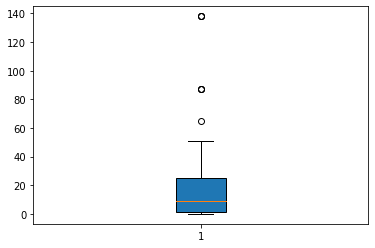

In [18]:
import matplotlib.pyplot as plt

plt.boxplot(articles_number_notes, patch_artist=True);

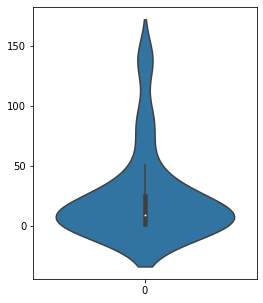

In [19]:
import seaborn as sns
plt.figure(figsize=(4,5))
sns.violinplot(data=articles_number_notes);